# Car Price- Prediction Project

# Overview:-

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

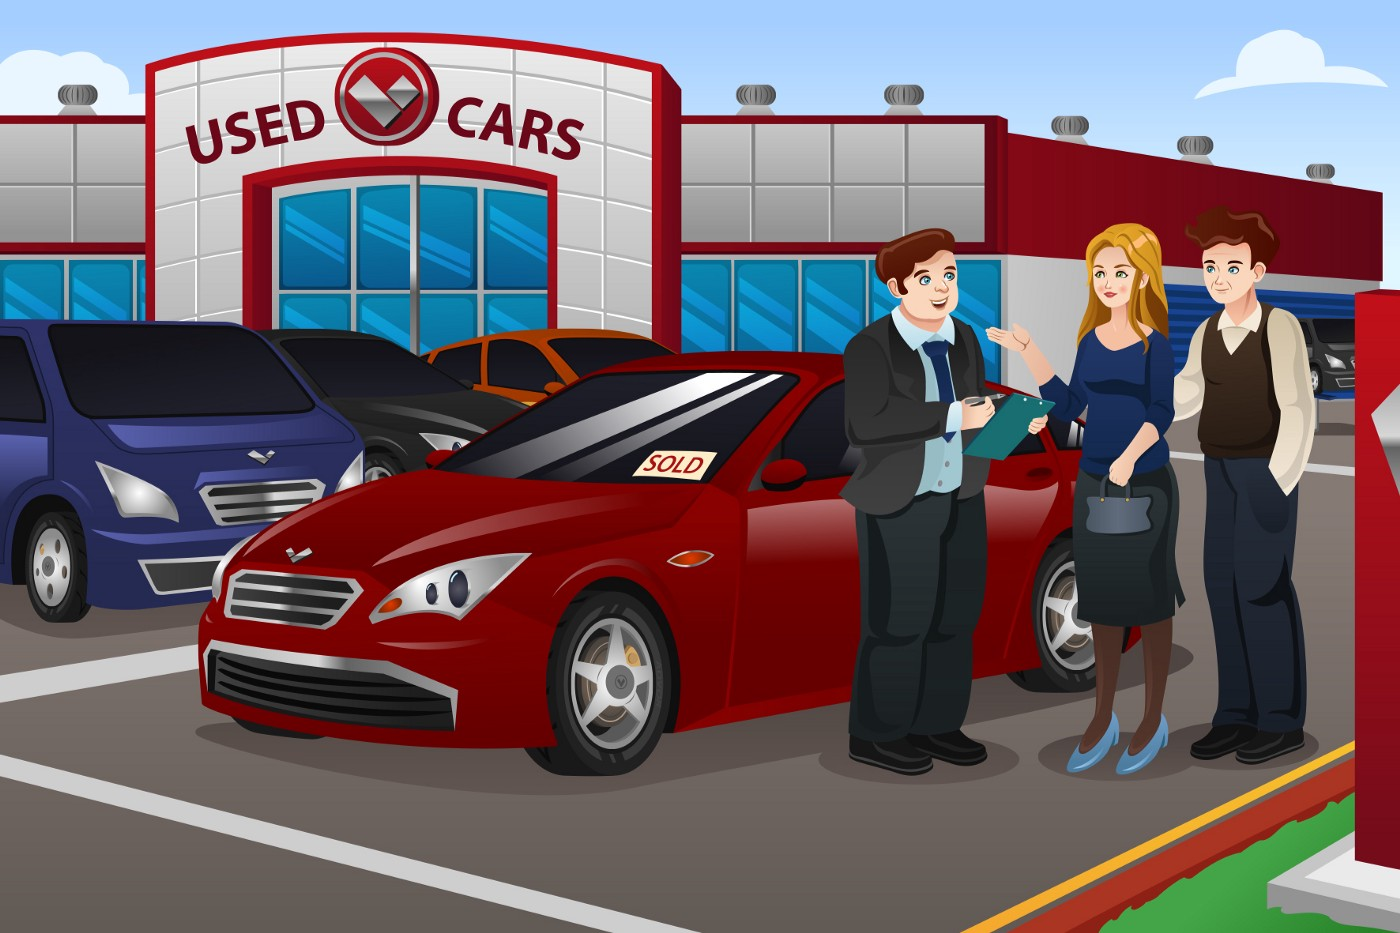

In [1]:
#Car Price prediction image
from IPython import display
display.Image("uc.jpeg")

# Problem Statement:-

This project contains two phase-

1- Data Collection Phase:-
    
We have to scrape at least 5000 used cars data. We can scrape more data as well, it’s up to us. more the data better the model. In this section we need to scrape the data of used cars from websites (cardekho, Cars24 etc.) We need web scraping for this. We have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to us and our creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give us a hint about important variables in used car model. We can make changes to it, we can add or we can remove some columns, it completely depends on the website from which we are fetching the data. We will try to include all types of cars in our data for example- SUV, Sedans, Coupe, minivan, Hatchback.

2- Model Building Phase:-

After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like.

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

# Business Goal:-
    
First we need to collect used car data from different websites using web scraping techniques and then need to build a machine learning model.

Target Variable:- Target Variable is Price in this project and it is continuous in nature so we will use Regression algorithms to make our model.

# DataSet Information:-

Dataset:- Different columns are as:-

1- Brand-> Brand name of Car

2-Model-> Model Information

3-Variant-> Model Variant

4-Manufacturing Year-> Year of Manufacturing

5-Driven Kilometers-> Distance Travelled

6-Fuel-> Type of Fuel

7-Location-> Location belongs to used car

8-Body Type-> Body type of Car

9-Owners_number-> Number of owners of used car

10-Ref. Website-> Source of information

11- Price-> Current Price of used car

# Software & Hardware Requirements:-

We have used Python and Jupyter Notebook to compute the majority of this case study. Packages and libraries used in this project are:-

1- Pandas (data analysis)

2- Numpy (matrix computation)

3- Matplotlib.pyplot (Visualization)

4- Seaborn (visualization)

5- Scikit-Learn (Machine Learning)

6- Scipy (Z-score)

7- Joblib (saving final model)

8- Selenium Webdriver & Exceptions

9- Warnings (filter warnings) & etc. Microsoft Excel ( for calculations and Data Handling)

Processor used:- Intel I3

O/s used: 64bit Windows 10

RAM:4GB

# Steps used in this project:-
    
1- Define the Problem

2- Data Gathering

3- Data Cleaning

4- Data Exploration and Visualization

5- Train the algorithm

6- Evaluate our model using evaluation metrics & etc.

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
#importing dataset
df=pd.read_csv('cardata.csv')
df

,Unnamed: 0,Unnamed: 0.1,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number,Price,Ref. Website
0,0,0,Honda,Brio,S MT,2015,"29,411 kms",Petrol,Delhi NCR,Hatchback,1st Owner,343000.0,www.cardekho.com
1,1,1,Maruti,Alto,VXI,2017,"23,845 kms",Petrol,Delhi NCR,Hatchback,1st Owner,284000.0,www.cardekho.com
2,2,2,Maruti,Baleno,Delta,2015,"49,192 kms",Petrol,Delhi NCR,Hatchback,1st Owner,466000.0,www.cardekho.com
3,3,3,Maruti,Swift,VXI,2018,"19,492 kms",Petrol,Delhi NCR,Hatchback,1st Owner,569000.0,www.cardekho.com
4,4,4,Maruti,Alto,VXI AMT,2015,"39,833 kms",Petrol,Delhi NCR,Hatchback,1st Owner,308000.0,www.cardekho.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,5190,2244,Maruti,Swift,VDI,2011,"1,05,683 km",Diesel,Pune,Sedan,1st Owner,334099.0,www.cars24.com
5191,5191,2245,Maruti,Ciaz,ZDI+,2015,"1,02,534 km",Diesel,Pune,Sedan,1st Owner,578299.0,www.cars24.com
5192,5192,2246,Honda,City,V MT PETROL,2013,"98,921 km",Petrol,Pune,Sedan,2nd Owner,368299.0,www.cars24.com
5193,5193,2247,Volkswagen,Vento,HIGHLINE 1.2 TSI,2016,"1,17,793 km",Petrol,Pune,Sedan,1st Owner,580499.0,www.cars24.com


In [17]:
#converting 1st, 2nd, 3rd, 4th, 5th owner to 1, 2, 3, 4, 5 in Owners_number to keep data in same constraints.
for x, y in zip(['1st Owner','2nd Owner','3rd Owner','4th Owner','5th Owner'],['First','Second','Third','Fourth','Fifth']):
    df["Owners_number"] = df["Owners_number"].str.replace(x,y)
df["Owners_number"].unique()

array(['First', 'Second', 'Third', 'Fourth', 'Fifth'], dtype=object)

In [18]:
#Removing Columns "Unnamed:0 & Unnamed: 0.1" as these will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Unnamed: 0.1',axis=1,inplace=True)
#Removing column "Ref. Website" also as it will not affect our core dataset
df.drop('Ref. Website',axis=1,inplace=True)
df.head()

,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number,Price
0,Honda,Brio,S MT,2015,"29,411 kms",Petrol,Delhi NCR,Hatchback,First,343000.0
1,Maruti,Alto,VXI,2017,"23,845 kms",Petrol,Delhi NCR,Hatchback,First,284000.0
2,Maruti,Baleno,Delta,2015,"49,192 kms",Petrol,Delhi NCR,Hatchback,First,466000.0
3,Maruti,Swift,VXI,2018,"19,492 kms",Petrol,Delhi NCR,Hatchback,First,569000.0
4,Maruti,Alto,VXI AMT,2015,"39,833 kms",Petrol,Delhi NCR,Hatchback,First,308000.0


In [19]:
#Shape of our Dataset after removal of 3 Columns
print("Shape of our dataset is ",df.shape)
print("Column count in our dataset is",df.shape[1])
print("Row count in our dataset is ",df.shape[0])

Shape of our dataset is  (5195, 10)
Column count in our dataset is 10
Row count in our dataset is  5195


In [20]:
#Let's check type of data in our Dataset
df.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing year      int64
Driven kilometers      object
Fuel                   object
Location               object
Body type              object
Owners_number          object
Price                 float64
dtype: object

In [21]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())
print("\nPlease see the detail below:-")
df.isna()

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Brand                 0
Model                 0
Variant               0
Manufacturing year    0
Driven kilometers     0
Fuel                  0
Location              0
Body type             0
Owners_number         0
Price                 0
dtype: int64

Please see the detail below:-


,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5190,False,False,False,False,False,False,False,False,False,False
5191,False,False,False,False,False,False,False,False,False,False
5192,False,False,False,False,False,False,False,False,False,False
5193,False,False,False,False,False,False,False,False,False,False


In [22]:
#Let's check our columns in detail
df.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing year', 'Driven kilometers',
       'Fuel', 'Location', 'Body type', 'Owners_number', 'Price'],
      dtype='object')

In [23]:
#Concise Summary of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5195 non-null   object 
 1   Model               5195 non-null   object 
 2   Variant             5195 non-null   object 
 3   Manufacturing year  5195 non-null   int64  
 4   Driven kilometers   5195 non-null   object 
 5   Fuel                5195 non-null   object 
 6   Location            5195 non-null   object 
 7   Body type           5195 non-null   object 
 8   Owners_number       5195 non-null   object 
 9   Price               5195 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 406.0+ KB


In [24]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique()) 

Column-wise Unique values are as:-

 Unique values in  Brand  column is  27

 Unique values in  Model  column is  154

 Unique values in  Variant  column is  1133

 Unique values in  Manufacturing year  column is  19

 Unique values in  Driven kilometers  column is  3309

 Unique values in  Fuel  column is  6

 Unique values in  Location  column is  7

 Unique values in  Body type  column is  5

 Unique values in  Owners_number  column is  5

 Unique values in  Price  column is  2217


In [25]:
#checking size of dataFrame
df.size

51950

In [26]:
#Let's check value count of object datatype columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

Maruti           2397
Hyundai          1253
Honda             449
Volkswagen        319
Toyota            136
Renault           127
Tata              105
Ford               98
Chevrolet          53
Mahindra           40
Skoda              38
Nissan             36
Datsun             28
Mercedes-Benz      26
BMW                23
Fiat               20
Mini               16
Audi               11
Volvo               6
Land                4
Jaguar              3
Porsche             2
Premier             1
Mitsubishi          1
Lexus               1
Bentley             1
Jeep                1
Name: Brand, dtype: int64

Swift       660
Wagon       458
Alto        425
i20         347
Grand       281
           ... 
XF            1
Cruze         1
TT            1
EcoSport      1
S90           1
Name: Model, Length: 154, dtype: int64

VXI            242
VXI            161
LXI            127
LXI            112
Sportz          75
              ... 
XO               1
GT TSI BSIV      1
1.6 SX     

<AxesSubplot:>

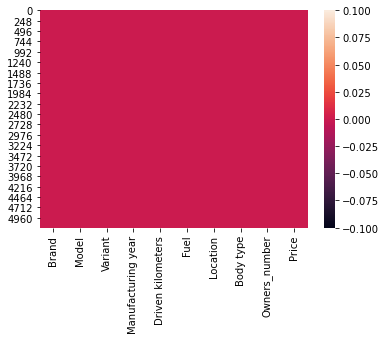

In [27]:
#To check missing values using Seaborn Heatmap
sns.heatmap(df.isnull())

Observation:

Dataset has no missing values.

# Data Visualization

# Univariate Analysis

Exploring Target Variable

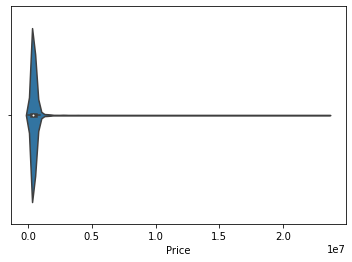

In [28]:
#Let's explore our target variable "Price" using violinPlot
sns.violinplot(df['Price'])
plt.show()

In [29]:
#checking its value_counts
df['Price'].value_counts()

275000.0    54
425000.0    53
350000.0    51
325000.0    49
450000.0    49
            ..
449699.0     1
366399.0     1
528000.0     1
268099.0     1
292899.0     1
Name: Price, Length: 2217, dtype: int64

Observation:
    
Maximum number of car Prices range between 275000-450000.

# Exploring Input Features

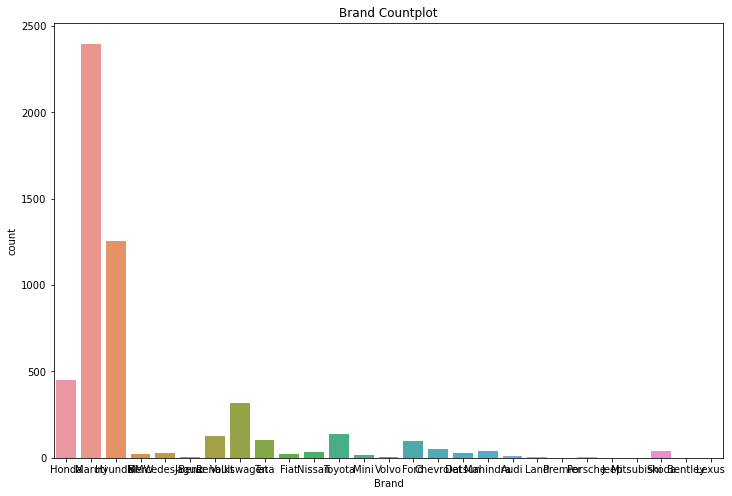

In [30]:
#Let's explore "Brand" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Brand", data=df)
plt.title("Brand Countplot")
plt.xlabel('Brand')
plt.ylabel("count")
plt.show()

In [31]:
df['Brand'].value_counts()

Maruti           2397
Hyundai          1253
Honda             449
Volkswagen        319
Toyota            136
Renault           127
Tata              105
Ford               98
Chevrolet          53
Mahindra           40
Skoda              38
Nissan             36
Datsun             28
Mercedes-Benz      26
BMW                23
Fiat               20
Mini               16
Audi               11
Volvo               6
Land                4
Jaguar              3
Porsche             2
Premier             1
Mitsubishi          1
Lexus               1
Bentley             1
Jeep                1
Name: Brand, dtype: int64

Observation:

Maruti & Hyndai are most popular brands.

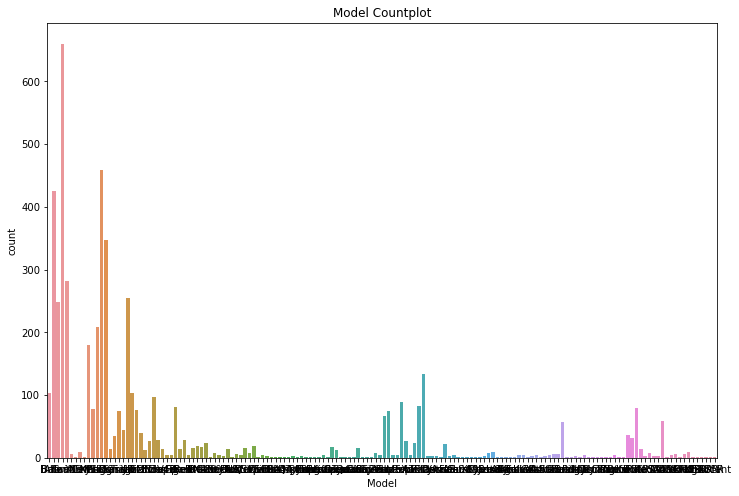

In [32]:
#Let's explore "Model" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Model", data=df)
plt.title("Model Countplot")
plt.xlabel('Model')
plt.ylabel("count")
plt.show()

In [33]:
df['Model'].value_counts()

Swift       660
Wagon       458
Alto        425
i20         347
Grand       281
           ... 
XF            1
Cruze         1
TT            1
EcoSport      1
S90           1
Name: Model, Length: 154, dtype: int64

Observation:

Swift,Wagon & Alto are most used models.

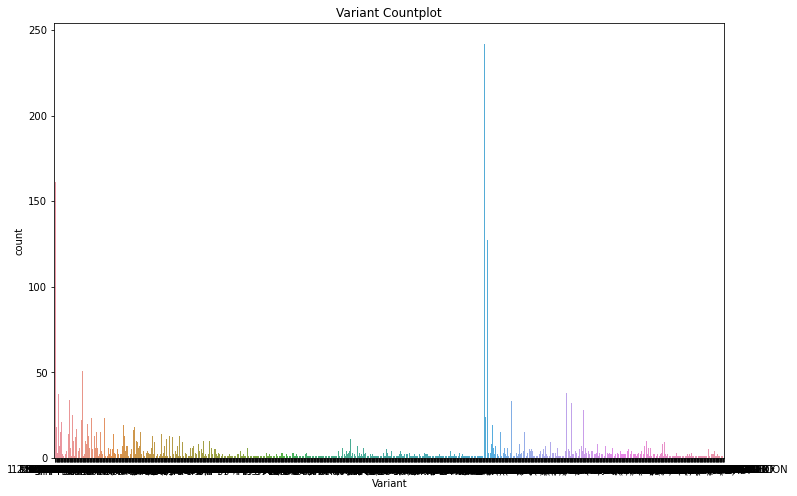

In [34]:
#Let's explore "Variant" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Variant", data=df)
plt.title("Variant Countplot")
plt.xlabel('Variant')
plt.ylabel("count")
plt.show()

In [35]:
df['Variant'].value_counts()

VXI            242
VXI            161
LXI            127
LXI            112
Sportz          75
              ... 
XO               1
GT TSI BSIV      1
1.6 SX           1
ZXI Plus         1
VTVT 1.4 E       1
Name: Variant, Length: 1133, dtype: int64

Observation:

VXI and LXI variants are mostly used.

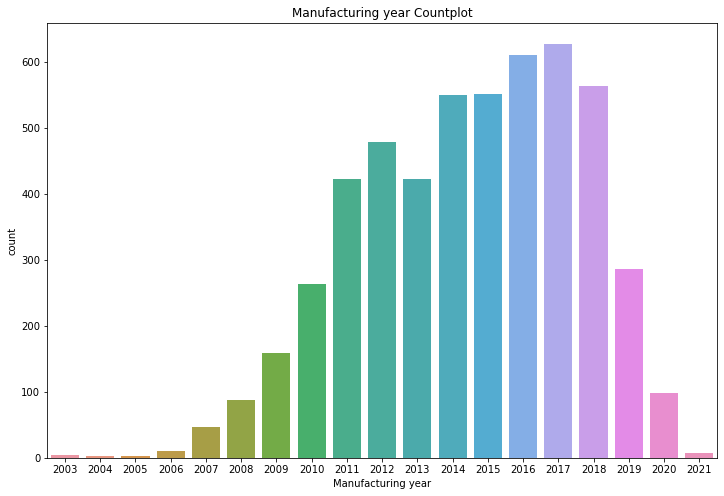

In [36]:
#Let's explore "Manufacturing year" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Manufacturing year", data=df)
plt.title("Manufacturing year Countplot")
plt.xlabel('Manufacturing year')
plt.ylabel("count")
plt.show()

In [37]:
df['Manufacturing year'].value_counts()

2017    628
2016    610
2018    563
2015    552
2014    550
2012    479
2011    422
2013    422
2019    287
2010    263
2009    159
2020     98
2008     87
2007     47
2006     10
2021      8
2003      5
2005      3
2004      2
Name: Manufacturing year, dtype: int64

Observation:

Highest used cars were manufactured in 2016 & 2017 respectively.

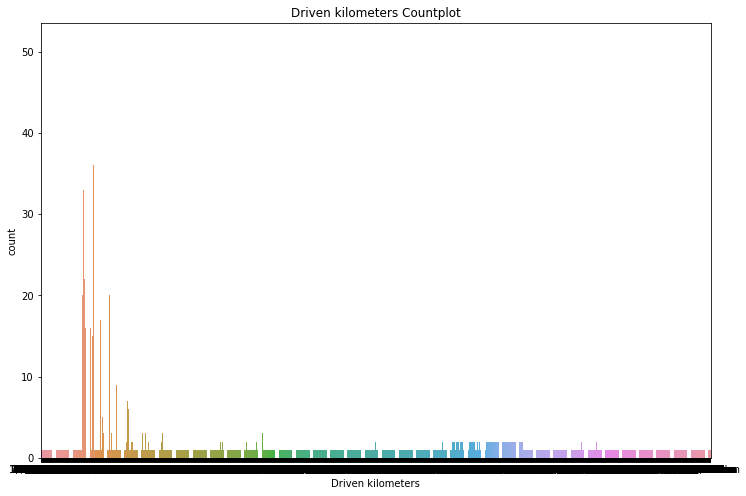

In [38]:
#Let's explore "Driven kilometers" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Driven kilometers", data=df)
plt.title("Driven kilometers Countplot")
plt.xlabel('Driven kilometers')
plt.ylabel("count")
plt.show()

In [39]:
df['Driven kilometers'].value_counts()

60,000 kms     51
35,000 kms     49
70,000 kms     44
50,000 kms     38
55,000 kms     37
               ..
48,551 kms      1
1,81,733 km     1
80,046 km       1
68,494 kms      1
86,145 km       1
Name: Driven kilometers, Length: 3309, dtype: int64

Observation:

Maximum Travelled Distance of used cars is between 35000-60000 kms.

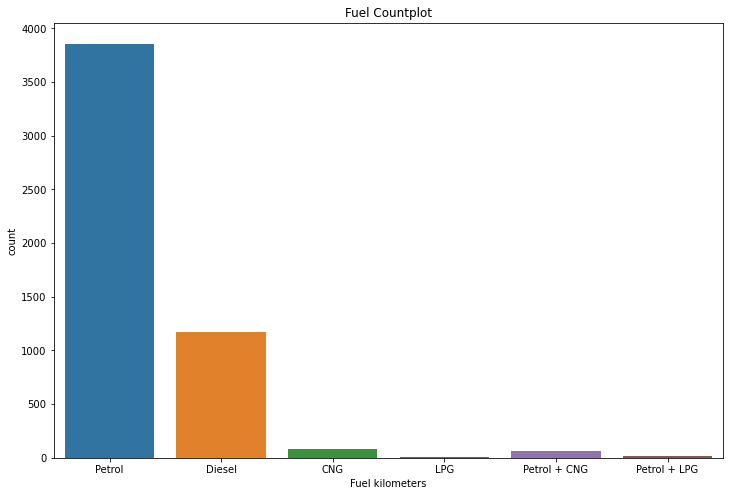

In [40]:
#Let's explore "Fuel" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Fuel", data=df)
plt.title("Fuel Countplot")
plt.xlabel('Fuel kilometers')
plt.ylabel("count")
plt.show()

In [41]:
df['Fuel'].value_counts()

Petrol          3857
Diesel          1169
CNG               79
Petrol + CNG      67
Petrol + LPG      14
LPG                9
Name: Fuel, dtype: int64

Observation:

Maximum cars are using Petrol Fuel.

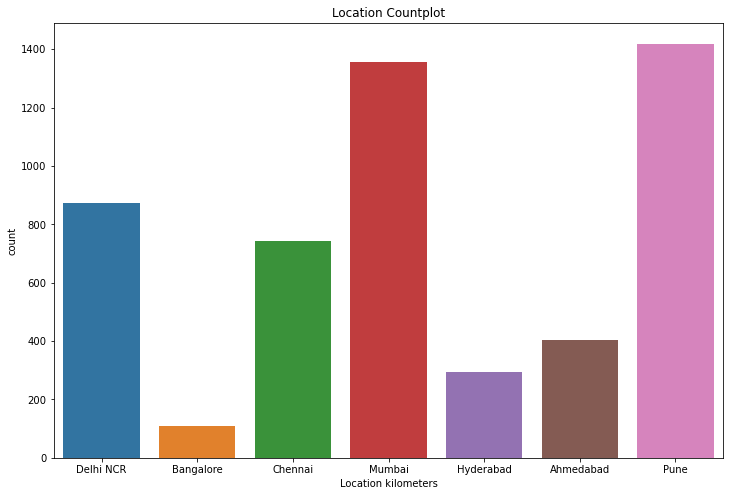

In [42]:
#Let's explore "Location" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Location", data=df)
plt.title("Location Countplot")
plt.xlabel('Location kilometers')
plt.ylabel("count")
plt.show()

In [43]:
df['Location'].value_counts()

Pune         1419
Mumbai       1357
Delhi NCR     873
Chennai       742
Ahmedabad     402
Hyderabad     294
Bangalore     108
Name: Location, dtype: int64

Observation:

Mostly used cars are available for sale in Pune & Mumbai.

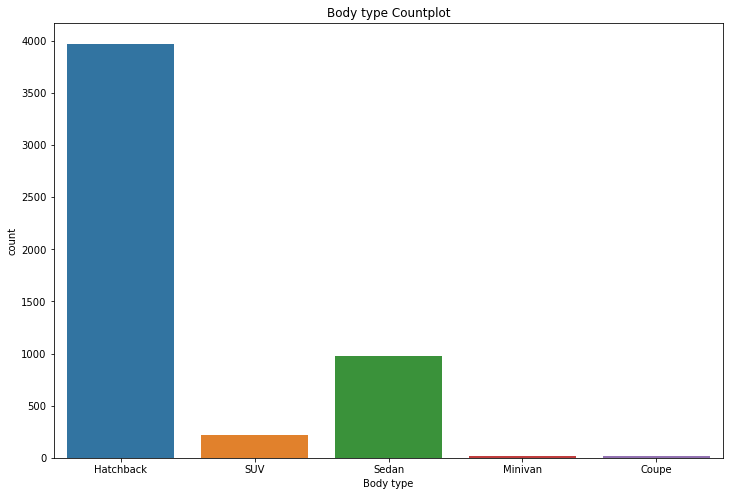

In [44]:
#Let's explore "Body type" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Body type", data=df)
plt.title("Body type Countplot")
plt.xlabel('Body type')
plt.ylabel("count")
plt.show()

In [45]:
df['Body type'].value_counts()

Hatchback    3973
Sedan         978
SUV           216
Minivan        14
Coupe          14
Name: Body type, dtype: int64

Observation:

Maximum number of used cars have Hatchback body.

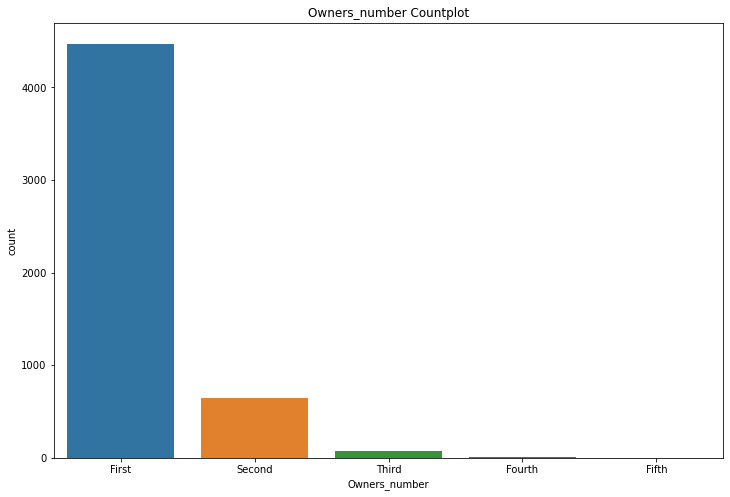

In [46]:
#Let's explore "Owners_number" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Owners_number", data=df)
plt.title("Owners_number Countplot")
plt.xlabel('Owners_number')
plt.ylabel("count")
plt.show()

In [47]:
df['Owners_number'].value_counts()

First     4471
Second     647
Third       70
Fourth       5
Fifth        2
Name: Owners_number, dtype: int64

Observation:

Maximum cars are owned by First owner. Also, when number of owners are high then it will become hard to sell those cars.

# Bivariate Analysis

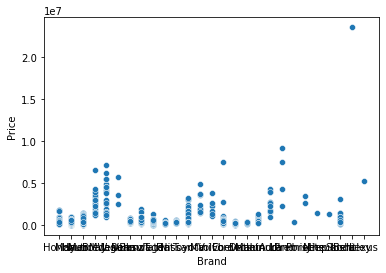

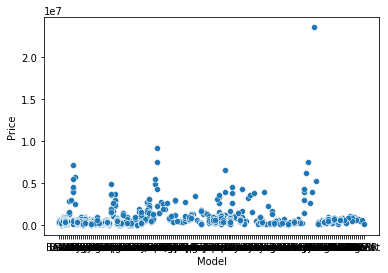

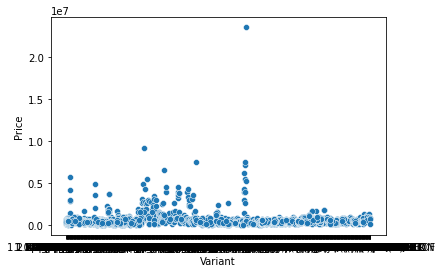

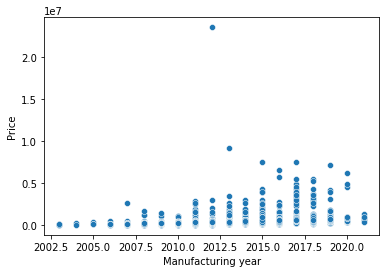

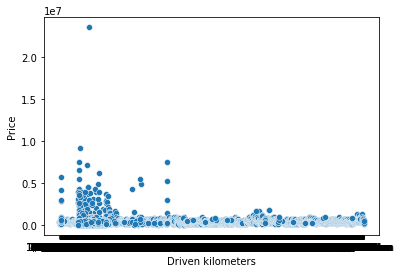

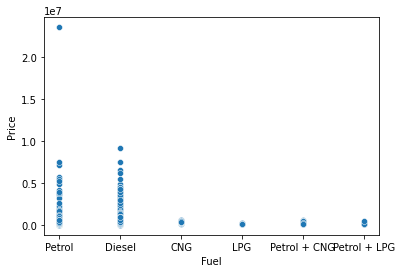

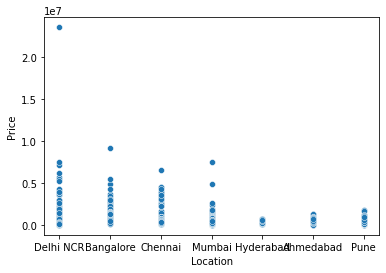

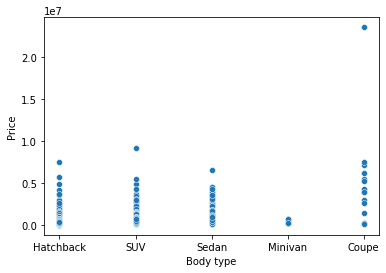

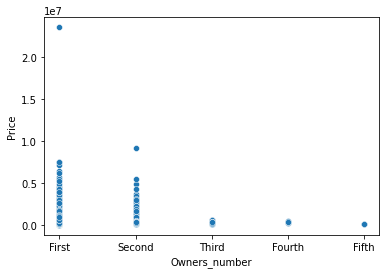

In [48]:
#Scatter Plots between output & Input variables
out_var=df['Price']
input_var=df.drop(['Price'],axis=1)
for i in input_var.columns:
    plt.subplots()
    sns.scatterplot(input_var[i],out_var)

In [49]:
#making different lists for categorical & continuous variables
category_features=[x for x in df.columns if df[x].dtype==object]
cont_features=[x for x in df.columns if x not in category_features]
list(category_features)

['Brand',
 'Model',
 'Variant',
 'Driven kilometers',
 'Fuel',
 'Location',
 'Body type',
 'Owners_number']

In [50]:
#Continuous list
list(cont_features)

['Manufacturing year', 'Price']

<Figure size 1512x1008 with 0 Axes>

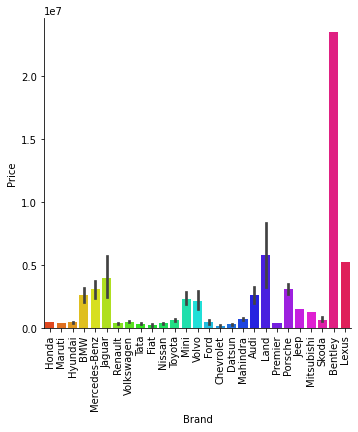

<Figure size 1512x1008 with 0 Axes>

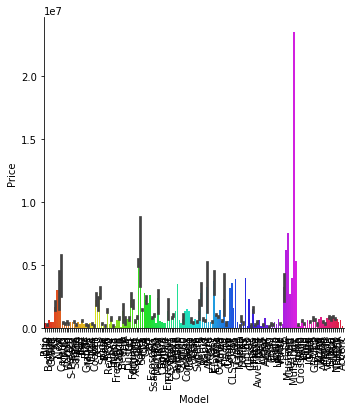

<Figure size 1512x1008 with 0 Axes>

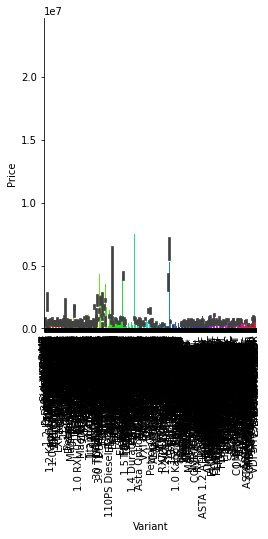

<Figure size 1512x1008 with 0 Axes>

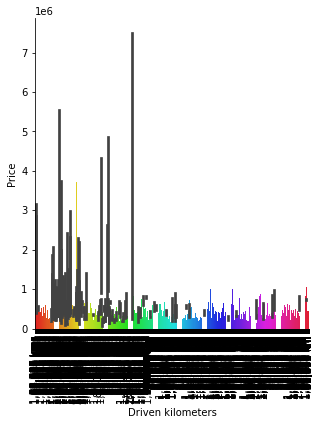

<Figure size 1512x1008 with 0 Axes>

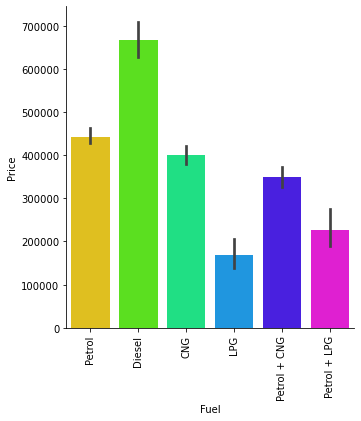

<Figure size 1512x1008 with 0 Axes>

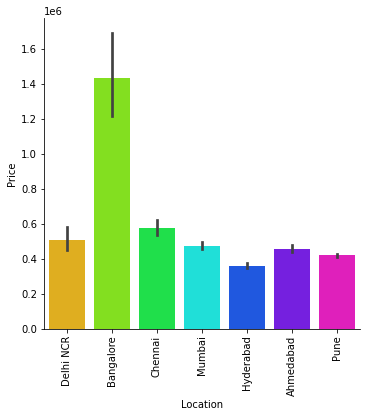

<Figure size 1512x1008 with 0 Axes>

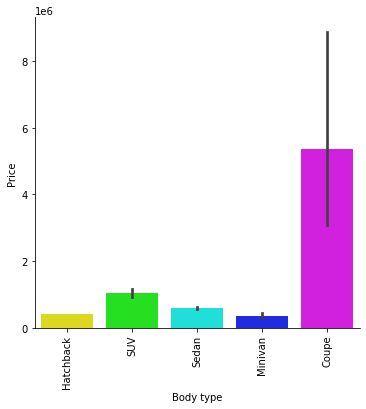

<Figure size 1512x1008 with 0 Axes>

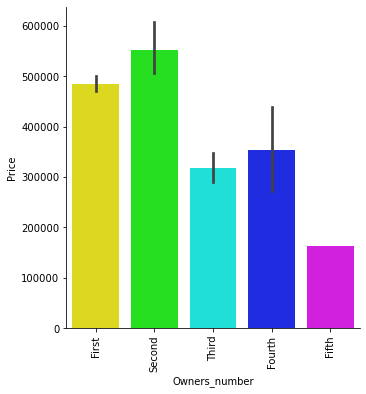

In [51]:
#Catplot between output feature & categorical input feartures
for i in category_features:
    plt.figure(figsize=(21,14))
    sns.catplot(y='Price',x=i,data=df,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

Observation:
    
1- Price is maximum for coupe body type cars.

2- 2nd & 1st owner cars have high price.

3- Bangalore city have higher price rate for cars.

4- Diesel cars have more price than others.

5- Bentley cars are very costly.

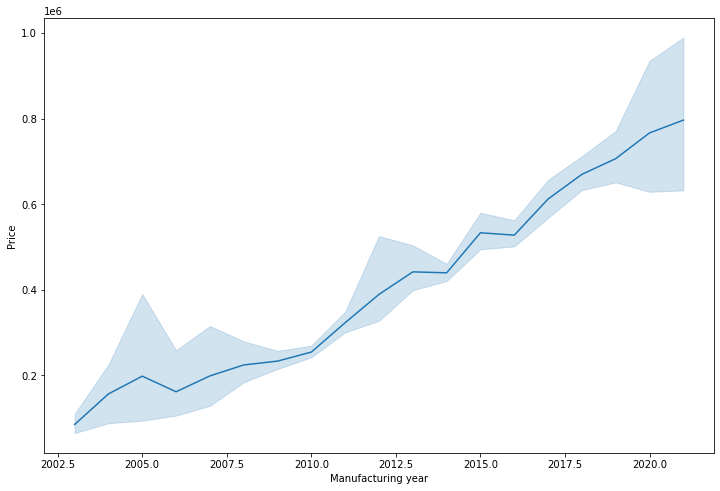

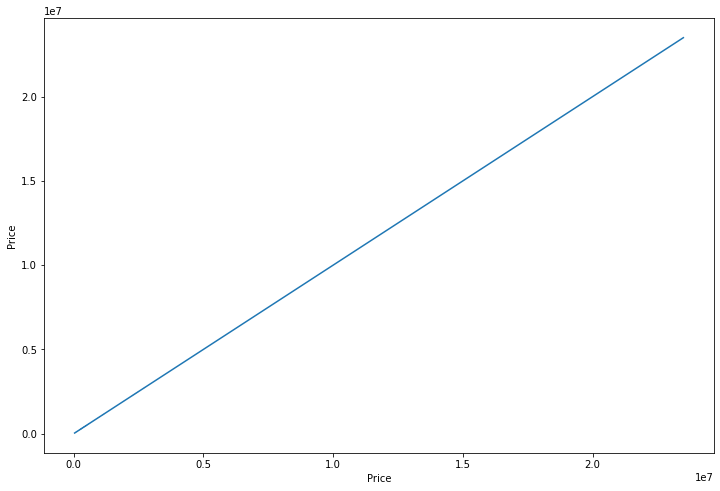

In [52]:
#Lineplot between output feature & Continuous input feartures
for i in cont_features:
    plt.figure(figsize=(12,8))
    sns.lineplot(y='Price',x=i,data=df)
    plt.show()

Observation:
    
Car prices are increasing year by year.

# Feature Engineering

In [53]:
#Encoding categorical data in to numerical format for better processing using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i].astype(str))

In [54]:
#Concise Summary of our DataFrame after Feature Engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5195 non-null   int32  
 1   Model               5195 non-null   int32  
 2   Variant             5195 non-null   int32  
 3   Manufacturing year  5195 non-null   int64  
 4   Driven kilometers   5195 non-null   int32  
 5   Fuel                5195 non-null   int32  
 6   Location            5195 non-null   int32  
 7   Body type           5195 non-null   int32  
 8   Owners_number       5195 non-null   int32  
 9   Price               5195 non-null   float64
dtypes: float64(1), int32(8), int64(1)
memory usage: 243.6 KB


# Histogram of individual features

array([[<AxesSubplot:title={'center':'Brand'}>,
        <AxesSubplot:title={'center':'Model'}>,
        <AxesSubplot:title={'center':'Variant'}>],
       [<AxesSubplot:title={'center':'Manufacturing year'}>,
        <AxesSubplot:title={'center':'Driven kilometers'}>,
        <AxesSubplot:title={'center':'Fuel'}>],
       [<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'Body type'}>,
        <AxesSubplot:title={'center':'Owners_number'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

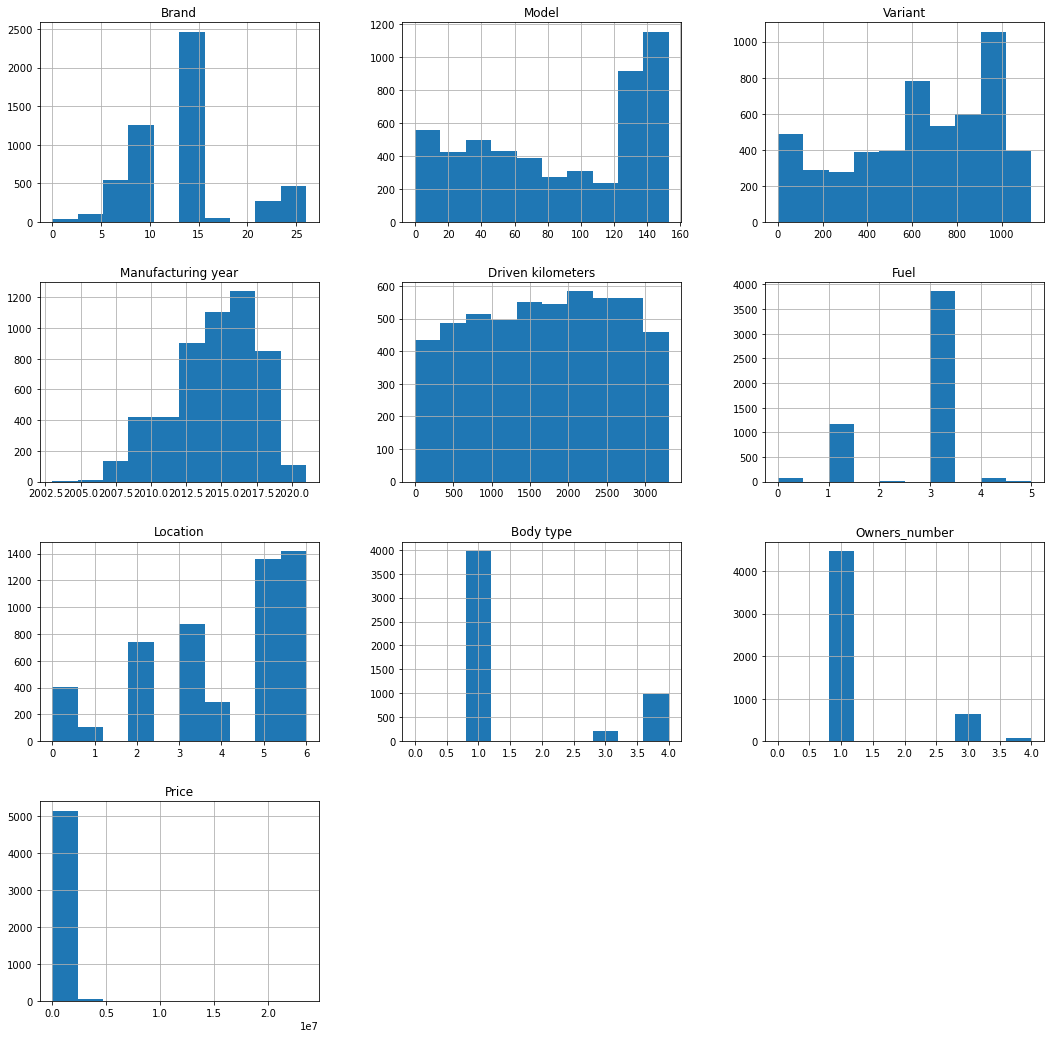

In [55]:
# histogram of individual feature using hist function
df.hist(figsize=(18,18),grid=True)

Observation:

Presence of unusual values in above histograms & also distribution is not normal in some columns and these things denote the possibility of potential outliers.

# Multivariate Analysis

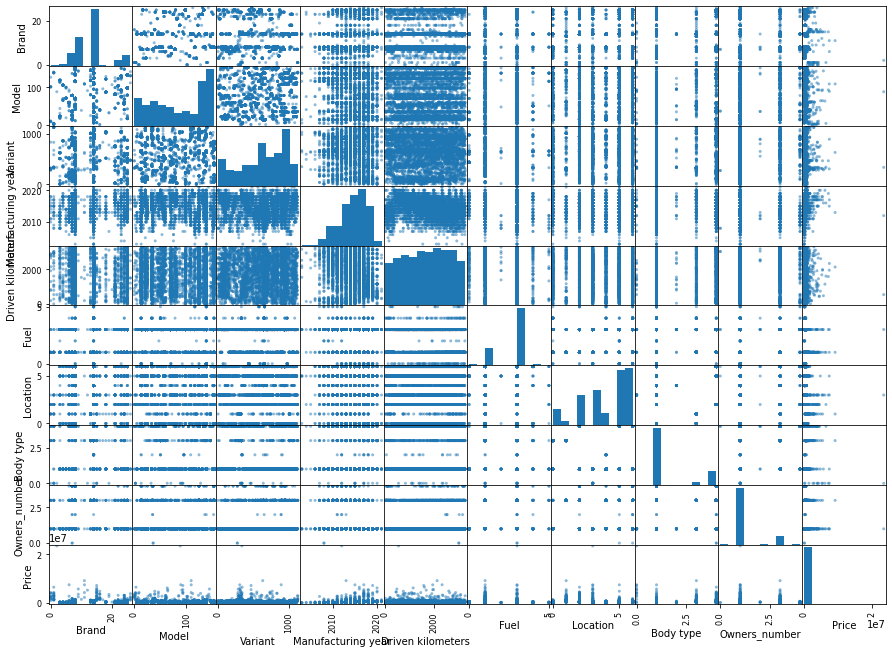

In [56]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,11),grid=True)
plt.show()

Observation:

Using multivariate analysis we can look at the interactions between the variables.Scatterplots of all pair of attributes helps us to spot structured relationship between input variables.

# SUMMARY STATISTICS

In [57]:
#Lets describe the dataset
df.describe()

,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number,Price
count,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5195.000000,5.195000e+03
mean,12.897786,86.437729,642.085852,2014.473725,1693.740905,2.520885,3.981906,1.647931,1.290087,4.906834e+05
std,5.467105,49.237577,311.431353,3.072201,925.055249,0.912676,1.875829,1.202701,0.732627,5.569031e+05
min,0.000000,0.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+04
25%,8.000000,35.000000,410.000000,2012.000000,913.500000,3.000000,3.000000,1.000000,1.000000,2.993490e+05
50%,14.000000,92.000000,672.000000,2015.000000,1728.000000,3.000000,5.000000,1.000000,1.000000,4.110000e+05
75%,14.000000,133.000000,918.500000,2017.000000,2488.000000,3.000000,6.000000,1.000000,1.000000,5.500000e+05
max,26.000000,153.000000,1132.000000,2021.000000,3308.000000,5.000000,6.000000,4.000000,4.000000,2.350000e+07


In [58]:
#checking Transpose of Statistical summary to get better understanding:-
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Brand,5195.0,12.897786,5.467105,0.0,8.0,14.0,14.0,26.0
Model,5195.0,86.437729,49.237577,0.0,35.0,92.0,133.0,153.0
Variant,5195.0,642.085852,311.431353,0.0,410.0,672.0,918.5,1132.0
Manufacturing year,5195.0,2014.473725,3.072201,2003.0,2012.0,2015.0,2017.0,2021.0
Driven kilometers,5195.0,1693.740905,925.055249,0.0,913.5,1728.0,2488.0,3308.0
Fuel,5195.0,2.520885,0.912676,0.0,3.0,3.0,3.0,5.0
Location,5195.0,3.981906,1.875829,0.0,3.0,5.0,6.0,6.0
Body type,5195.0,1.647931,1.202701,0.0,1.0,1.0,1.0,4.0
Owners_number,5195.0,1.290087,0.732627,0.0,1.0,1.0,1.0,4.0
Price,5195.0,490683.373436,556903.100375,40000.0,299349.0,411000.0,550000.0,23500000.0


Observations:

1- For input features, Driven kilometers has highest standard deviation of 925.05.

2- Maximum Price of car is 23500000.0 and minimumm price is 40000.0.

3- In body type & owners number,the value of mean is considerably greater than median so there are strong chances of positive skewness.

4- In remaining columns, value of median is greater than mean so the columns are negatively skewed.

# Correlation Matrix

In [59]:
#Let's check correlation in our Dataset
dfcor=df.corr()
dfcor

,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number,Price
Brand,1.000000,0.005401,0.057215,0.104432,-0.017520,-0.076994,0.043299,0.049310,-0.033790,-0.023400
Model,0.005401,1.000000,0.126567,-0.192331,0.064820,-0.098379,0.020110,-0.058357,0.006076,-0.052132
Variant,0.057215,0.126567,1.000000,-0.089307,0.024724,-0.018420,0.046943,0.040371,0.051009,-0.083564
Manufacturing year,0.104432,-0.192331,-0.089307,1.000000,-0.235229,0.006530,-0.112134,-0.010919,-0.195449,0.255750
Driven kilometers,-0.017520,0.064820,0.024724,-0.235229,1.000000,-0.103265,-0.025936,-0.014022,0.032226,-0.059499
Fuel,-0.076994,-0.098379,-0.018420,0.006530,-0.103265,1.000000,0.068707,-0.225790,-0.007191,-0.152984
Location,0.043299,0.020110,0.046943,-0.112134,-0.025936,0.068707,1.000000,-0.034826,-0.013832,-0.114887
Body type,0.049310,-0.058357,0.040371,-0.010919,-0.014022,-0.225790,-0.034826,1.000000,0.150454,0.143797
Owners_number,-0.033790,0.006076,0.051009,-0.195449,0.032226,-0.007191,-0.013832,0.150454,1.000000,0.020515
Price,-0.023400,-0.052132,-0.083564,0.255750,-0.059499,-0.152984,-0.114887,0.143797,0.020515,1.000000


<AxesSubplot:>

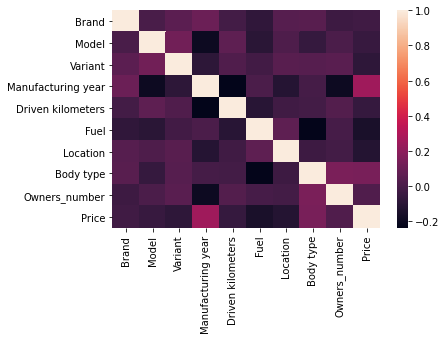

In [60]:
#checking correlation using Heatmap
sns.heatmap(dfcor)

<AxesSubplot:>

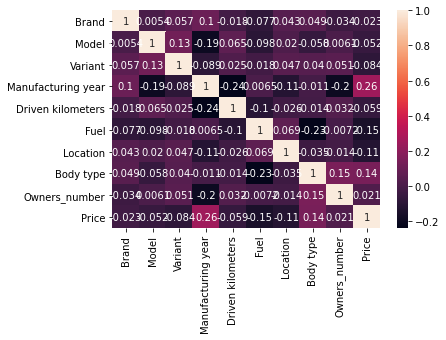

In [61]:
#Heatmap with annotations & color_palette
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

<AxesSubplot:>

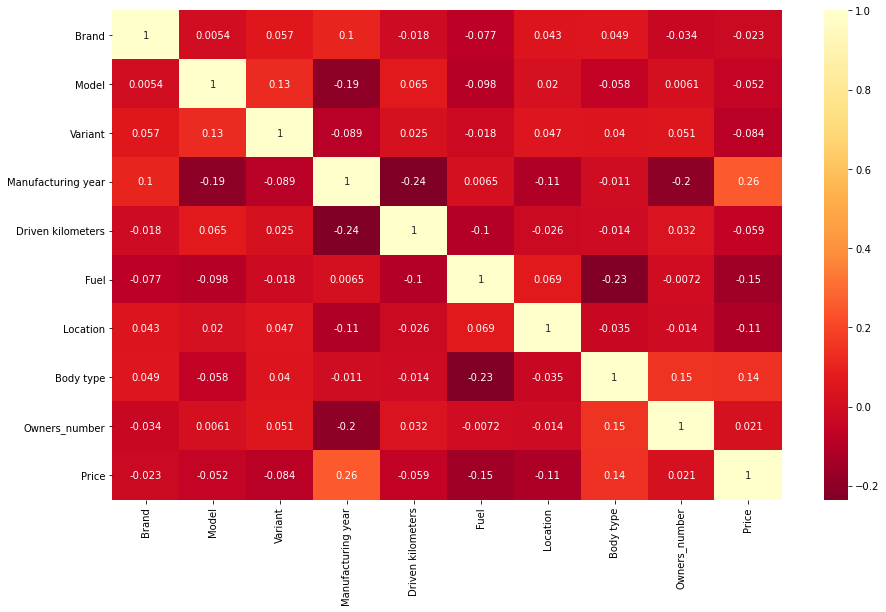

In [62]:
plt.figure(figsize=(15,9))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)  

Observations:-
    
1- Price is highly correlated with Manufacturing Year & Body type columns.

2- Price is negatively correlated with Fuel.

# Correlation between input and output variable "Price"

Text(0.5, 1.0, 'correaltion between input & target feature')

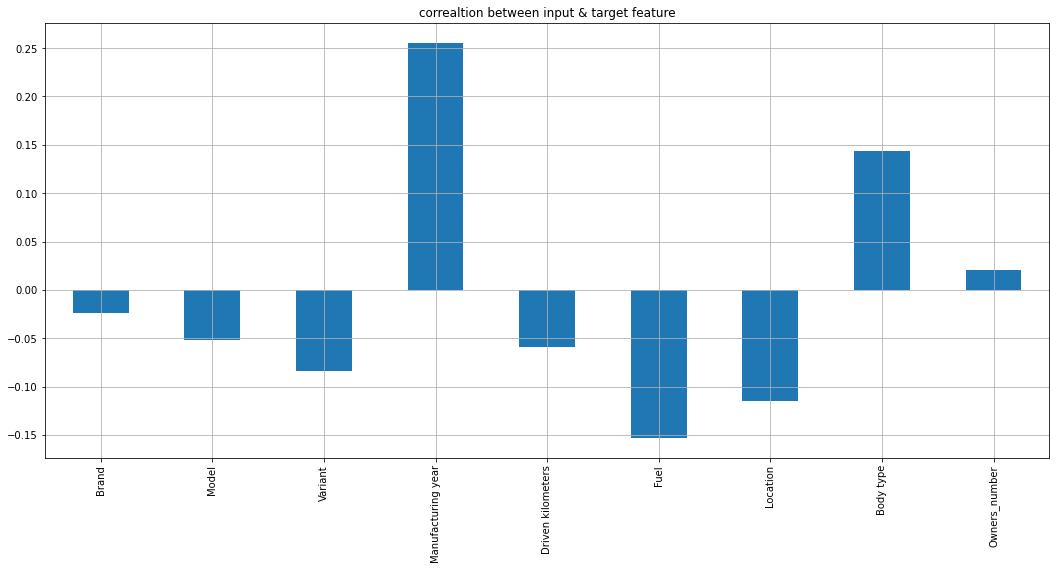

In [63]:
#Let's check correlation between input & output variable
plt.figure(figsize=(18,8))
df.drop('Price', axis=1).corrwith(df['Price']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion between input & target feature")

Observation:

1- Manufacturing Year column is most positively correlated with Price column.

2- Fuel column is most negatively correlated with Price column.

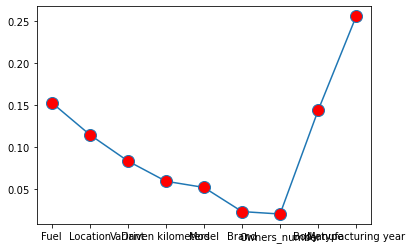

In [64]:
#checking highly correlated values with Output variable Price
abs(df.corr().loc['Price'].drop('Price').sort_values()).plot(marker='o',markerfacecolor='red',markersize=12)
plt.show()

# Plotting Outliers

Brand                   AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
Model                 AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
Variant               AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
Manufacturing year    AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Driven kilometers     AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Fuel                  AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Location              AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Body type             AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
Owners_number           AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
Price                 AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
dtype: object

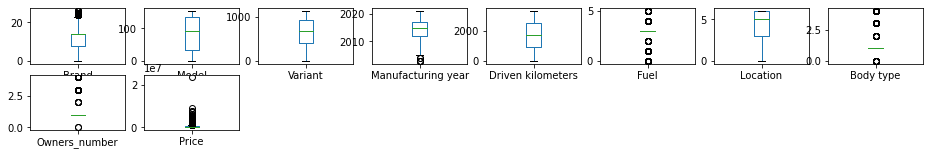

In [65]:
#Univariate Analysis(Boxplot)
df.plot(kind='box',subplots=True,layout=(10,8),figsize=(16,12))

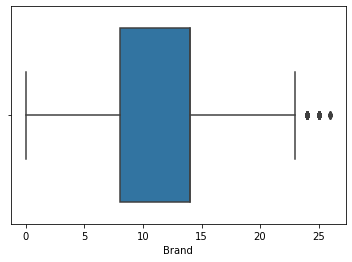

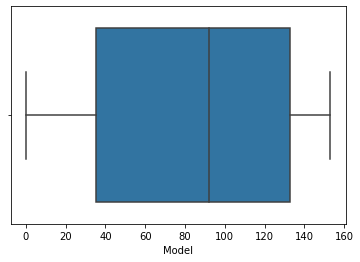

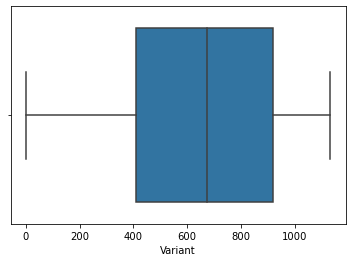

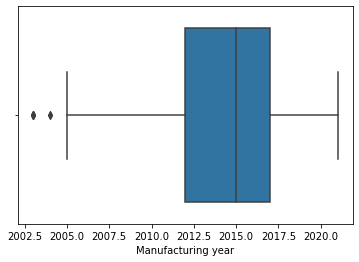

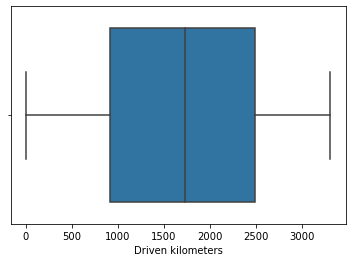

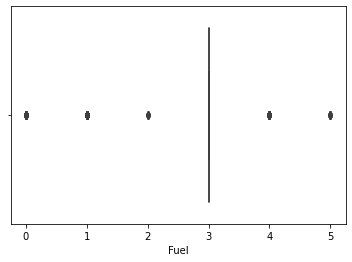

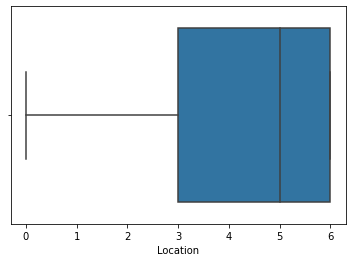

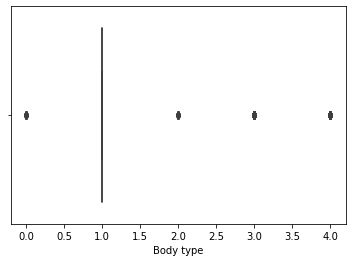

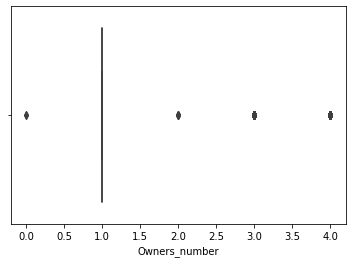

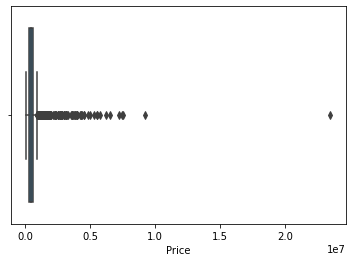

In [66]:
#checking boxplots column wise
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

Observation:

Outliers are present in various columns.

# To check Distribution of Skewness

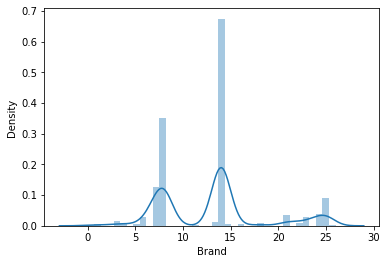

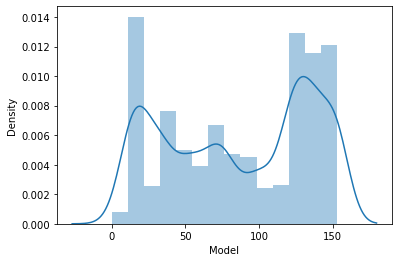

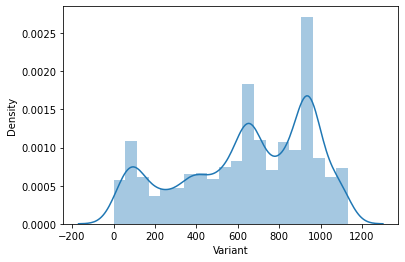

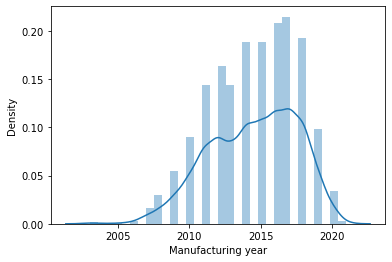

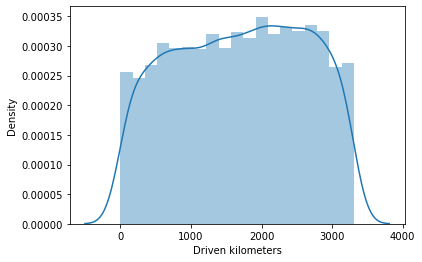

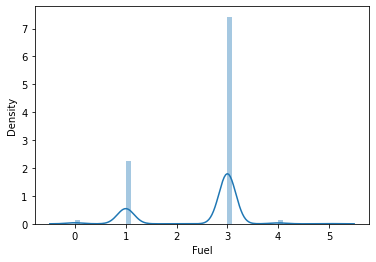

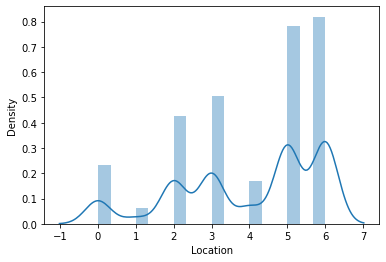

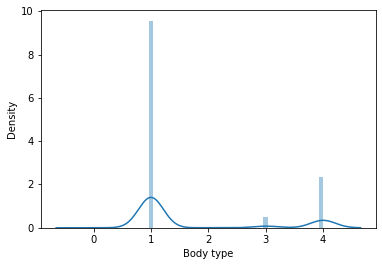

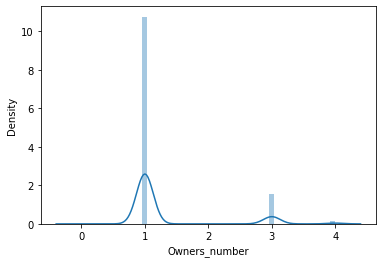

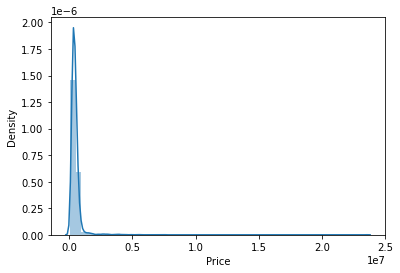

In [67]:
#Distplot for individual columns
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i],label = i)

Observation:

Skewness is present in various columns.

# Removing Outliers

In [68]:
#Let's remove the outliers using z scores
from scipy.stats import zscore
zs=np.abs(zscore(df))
print(zs.shape)

(5195, 10)


In [69]:
#checking which data have zscore more than 3
print(np.where(zs>3))

(array([  15,   16,   17,   18,  327,  346,  371,  861,  862,  865,  867,
        870,  874,  876,  877,  878,  883,  885,  888,  894,  908,  924,
        927,  929,  931,  932,  936,  937,  970,  976,  981,  991,  996,
       1039, 1058, 1059, 1060, 1061, 1063, 1066, 1070, 1127, 1133, 1135,
       1137, 1140, 1141, 1143, 1144, 1157, 1168, 1193, 1392, 1524, 1606,
       1650, 1778, 1972, 2063, 2065, 2075, 2341, 2471, 2472, 2473, 2474,
       2475, 2476, 2477, 2478, 2480, 2481, 2483, 3004, 3013, 3017, 3045,
       3053, 3082, 3086, 3166, 3172, 3201, 3251, 3314, 3337, 3353, 3442,
       3456, 3513, 3523, 3528, 3555, 3558, 3564, 3565, 3566, 3569, 3589,
       3651, 3724, 3737, 3739, 3776, 3787, 3806, 3832, 3851, 3863, 3874,
       3932, 4053, 4157, 4193, 4277, 4288, 4291, 4313, 4353, 4384, 4430,
       4442, 4496, 4517, 4533, 4575, 4627, 4643, 4692, 4749, 4758, 4786,
       4915, 4936, 4948, 4959, 5055, 5100, 5109, 5110, 5136, 5157, 5168],
      dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 9

In [70]:
#Dropping Outliers
df1=df.loc[(abs(zs)<3).all(axis=1)]
print(df1.shape)

(5052, 10)


Observation:

As per above shapes: 5195-5052=143 so 143 outliers are removed and data loss is nearly 2.75%.

In [71]:
#Lets divide dataset into input and output
x=df1.drop('Price',axis=1)
x.head()

,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number
0,7,25,776,2015,1114,3,3,1,1
1,14,13,945,2017,896,3,3,1,1
2,14,21,498,2015,1967,3,3,1,1
3,14,124,945,2018,702,3,3,1,1
4,14,13,961,2015,1581,3,3,1,1


In [72]:
print(x.shape)

(5052, 9)


In [73]:
#Output feature
y=df1['Price']
y.head()

0    343000.0
1    284000.0
2    466000.0
3    569000.0
4    308000.0
Name: Price, dtype: float64

In [74]:
print(y.shape)

(5052,)


# Skewness

In [76]:
#Lets chcek the skewness in input dataset
x.skew()

Brand                 0.700334
Model                -0.166592
Variant              -0.489627
Manufacturing year   -0.320047
Driven kilometers    -0.068423
Fuel                 -1.186916
Location             -0.658330
Body type             1.398192
Owners_number         2.271180
dtype: float64

In [77]:
#Let's check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

3


In [78]:
#Lets treat above skewness using cube root transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [79]:
#lets again check the skewness
x.skew()

Brand                -0.252458
Model                -0.166592
Variant              -0.489627
Manufacturing year   -0.320047
Driven kilometers    -0.068423
Fuel                 -1.186916
Location             -0.658330
Body type             1.284387
Owners_number         2.068892
dtype: float64

In [80]:
#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

2


In [81]:
#Lets treat above skewness using log transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.log1p(x[index])

In [82]:
#lets again check the skewness
x.skew()

Brand                -0.252458
Model                -0.166592
Variant              -0.489627
Manufacturing year   -0.320047
Driven kilometers    -0.068423
Fuel                 -1.186916
Location             -0.658330
Body type             1.096122
Owners_number         1.656998
dtype: float64

In [83]:
#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

2


In [84]:
#Lets treat above skewness using square root transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.sqrt(x[index])

# Data Preprocessing

In [85]:
#Lets do the preprocessing to bring features to common scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1.head()

,Brand,Model,Variant,Manufacturing year,Driven kilometers,Fuel,Location,Body type,Owners_number
0,-1.161327,-1.256315,0.422867,0.161850,-0.627868,0.518839,-0.531505,-0.494402,-0.33566
1,0.327502,-1.500513,0.963302,0.821257,-0.864207,0.518839,-0.531505,-0.494402,-0.33566
2,0.327502,-1.337714,-0.466132,0.161850,0.296892,0.518839,-0.531505,-0.494402,-0.33566
3,0.327502,0.758316,0.963302,1.150961,-1.074528,0.518839,-0.531505,-0.494402,-0.33566
4,0.327502,-1.500513,1.014467,0.161850,-0.121581,0.518839,-0.531505,-0.494402,-0.33566


In [86]:
#Input feature
x1.shape

(5052, 9)

# Evaluate Some Algorithms (Regression)

our target varibale is "Price" which is continuous in nature so we will use Regression algorithms to make our model.

In [87]:
#Let's check coefficient of determination(r2_score) to find the proportion of the variance in the 
#dependent variable that is predictable from the independent variable.
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
def maximumr2_score(rgn,x1,y):
    maximum_r_score =0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=r_state,test_size=0.20)
        rgn.fit(x_train,y_train)
        pred=rgn.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        if r2_scr>maximum_r_score:
            maximum_r_score=r2_scr
            final_r_state=r_state
    print('Maximum r2 score for final_r_state',final_r_state,'is',maximum_r_score)
    return final_r_state

In [88]:
# creating lists to store performance score
Rscore=[]
Cvscore=[]
Mse=[]
Mae=[]
Rmse=[]
model=['Linear Regression','k-nearest neighbors','Decision Tree Regression','Random Forest Regression','Ridge Regression','Lasso regression']

# Linear Regression

In [89]:
#For Linear Regression
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
r_state=maximumr2_score(lg,x1,y)
print('Mean r2 score for linear Regression is:',cross_val_score(lg,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for linear Regression is',cross_val_score(lg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 57 is 0.5214592959769327
Mean r2 score for linear Regression is: 0.370040203032275
	Best possible r2score is 1.0
Standard deviation in r2 score for linear Regression is 0.10587321438417739


In [90]:
#Cross Validation for Linear Regression
from sklearn import linear_model
print(cross_val_score(linear_model.LinearRegression(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(lg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(lg,x1,y,cv=5).mean()))*100)

[0.21633069 0.3293678  0.32835629 0.51219513 0.4639511 ]

Cross validation score is:  0.370040203032275


In [91]:
#Score & Error Metrics for Linear Regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=lg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.4628410493208107
Mean_Squared_Error = 22970344534.19105
Mean Absolute_Error = 96587.87576800401
Root Mean Squared Error = 151559.70616951937


# k-nearest neighbors

In [92]:
#Let's try to do Regression based on k-nearest neighbors.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
neighbors={'n_neighbors':range(1,27)}
knreg=KNeighborsRegressor()

# GridSearchCV
In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

In [93]:
#using gridsearch CV to find the best parameters to use in k-nearest neighbors regression. 
gridknr=GridSearchCV(knreg,neighbors,cv=10)
gridknr.fit(x1,y)
gridknr.best_params_

{'n_neighbors': 7}

In [94]:
#r2 scores for k-nearest neighbors regression.
knreg=KNeighborsRegressor(n_neighbors=7)
r_state=maximumr2_score(knreg,x1,y)
print('Mean r2 score for KNN Regression is:',cross_val_score(knreg,x1,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNN Regression is:',cross_val_score(knreg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 86 is 0.7333184194962706
Mean r2 score for KNN Regression is: 0.5041918293321668
standard deviation in r2 score for KNN Regression is: 0.1438154525615673


In [95]:
#Cross Validation for KNeighborsRegressor
print(cross_val_score(KNeighborsRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(knreg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(knreg,x1,y,cv=5).mean()))*100)

[0.31349876 0.54624468 0.63181681 0.71138971 0.31543458]

Cross validation score is:  0.5041918293321668


In [96]:
#Score & Error Metrics for k-nearest neighbors regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=89,test_size=0.20)
y_pred=knreg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.7404165664421474
Mean_Squared_Error = 13630107906.744804
Mean Absolute_Error = 70287.55023314964
Root Mean Squared Error = 116748.05311757796


# Decision Tree Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
r_state=maximumr2_score(dt,x1,y)
print('Mean r2 score for Decision Tree Regression is:',cross_val_score(dt,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Decision Tree Regression is',cross_val_score(dt,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 67 is 0.8255996821565016
Mean r2 score for Decision Tree Regression is: -0.18284511730285402
	Best possible r2score is 1.0
Standard deviation in r2 score for Decision Tree Regression is 1.323619489373976


In [98]:
#Cross Validation for Decision Tree regression
print(cross_val_score(DecisionTreeRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(dt,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(dt,x1,y,cv=5).mean()))*100)

[ 0.477927    0.63516909 -0.18968685  0.82105894 -2.68239479]

Cross validation score is:  -0.19876947684761026


In [99]:
#Score & Error Metrics for DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=80,test_size=0.20)
y_pred=dt.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.977706021507752
Mean_Squared_Error = 1134178524.4817014
Mean Absolute_Error = 9704.202769535113
Root Mean Squared Error = 33677.56708079878


# Random Forest Regression

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maximumr2_score(rf,x1,y)
print('Mean r2 score for Random Forest Regression is:',cross_val_score(rf,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Random Forest Regression is',cross_val_score(rf,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 96 is 0.8987740583158399
Mean r2 score for Random Forest Regression is: 0.4766359203874398
	Best possible r2score is 1.0
Standard deviation in r2 score for Random Forest Regression is 0.2540721361781564


In [101]:
#Cross Validation for Random Forest Regression
print(cross_val_score(RandomForestRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(rf,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(rf,x1,y,cv=5).mean()))*100)

[0.5270276  0.75503176 0.37255165 0.86615837 0.0978547 ]

Cross validation score is:  0.5173508777969934


In [102]:
#Score & Error Metrics for RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=60,test_size=0.20)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.9707012573610098
Mean_Squared_Error = 1387238008.940139
Mean Absolute_Error = 21482.434585747258
Root Mean Squared Error = 37245.64416062822


# Ridge Regression

In [104]:
from sklearn.linear_model import RidgeCV
rg=RidgeCV()
r_state=maximumr2_score(rg,x1,y)
print('Mean r2 score for Ridge Regression is:',cross_val_score(rg,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Ridge Regression is',cross_val_score(rg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 57 is 0.521368769822706
Mean r2 score for Ridge Regression is: 0.3703732387307142
	Best possible r2score is 1.0
Standard deviation in r2 score for Ridge Regression is 0.10602918540672017


In [105]:
#Cross Validation for Ridge Regression
print(cross_val_score(linear_model.RidgeCV(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(rg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(rg,x1,y,cv=5).mean()))*100)

[0.21635866 0.32942552 0.32887978 0.5124377  0.46476453]

Cross validation score is:  0.3703732387307142


In [106]:
#Score & Error Metrics for Ridge Regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=rg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.4628567131046538
Mean_Squared_Error = 22969674709.15857
Mean Absolute_Error = 96582.13128545426
Root Mean Squared Error = 151557.49638060987


# Lasso regression

In [107]:
#Using Lasso regression for a more accurate prediction.
from sklearn.linear_model import Lasso
lasso_reg=Lasso()

# GridSearch CV

In [108]:
#using gridsearch CV to find the best parameters to use in Lasso regression. 
parameters={"alpha":[0.001,0.01,0.1,1]}
gsc=GridSearchCV(lasso_reg,parameters,cv=10)
gsc.fit(x1,y)
gsc.best_params_

{'alpha': 1}

In [109]:
#As we used lasso Regression so Let's check Max & mean r2score
lasso_reg=Lasso(alpha=1)
r_state=maximumr2_score(lasso_reg,x1,y)
print('Mean r2 score for Lasso Regression is',cross_val_score(lasso_reg,x1,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Lasso Regrssion is',cross_val_score(lasso_reg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 57 is 0.5214598562371777
Mean r2 score for Lasso Regression is 0.37004498288237986
standard deviation in r2 score for Lasso Regrssion is 0.10587422649755192


In [110]:
#Cross Validation for Lasso regression
print(cross_val_score(linear_model.Lasso(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(lasso_reg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(lasso_reg,x1,y,cv=5).mean()))*100)

[0.21633208 0.32937082 0.32836472 0.51219899 0.4639583 ]

Cross validation score is:  0.37004498288237986


In [111]:
#Score & Error Metrics for Lasso regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=lasso_reg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.4628417817553008
Mean_Squared_Error = 22970313213.345394
Mean Absolute_Error = 96587.59366067933
Root Mean Squared Error = 151559.6028410783


In [112]:
#Combining all scores in one place to decide best performing models
model1=pd.DataFrame({})
model1['Model']=model
model1['Maximum r2 score']=Rscore
model1['Cross Validation Score']=Cvscore
model1['Mean absolute error']=Mae
model1['Root Mean Squared Error']=Rmse
model1['Mean squared error']=Mse
model1.round(2)

,Model,Maximum r2 score,Cross Validation Score,Mean absolute error,Root Mean Squared Error,Mean squared error
0,Linear Regression,46.28,37.00,96587.88,151559.71,2.297034e+10
1,k-nearest neighbors,74.04,50.42,70287.55,116748.05,1.363011e+10
2,Decision Tree Regression,97.77,-20.44,9704.20,33677.57,1.134179e+09
3,Random Forest Regression,97.07,55.97,21482.43,37245.64,1.387238e+09
4,Ridge Regression,46.29,37.04,96582.13,151557.50,2.296967e+10
5,Lasso regression,46.28,37.00,96587.59,151559.60,2.297031e+10


<AxesSubplot:xlabel='Maximum r2 score', ylabel='Model'>

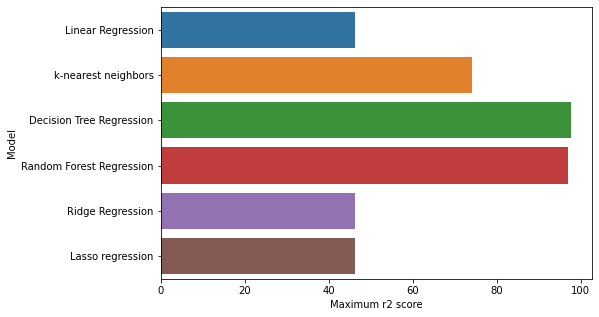

In [113]:
#Plotting bar plot of Maximum r2 scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Maximum r2 score', y = 'Model', data = model1)

Observations:

After comparing above 6 models, these 3 models are good:-

1- Random Forest Regression (R2 & Cross validation scores are higher & RMSE is minimum & other errors are less.)

2- Decision Tree Regression (R2 score is good & MAE is minimum & also other errors are less.)

3- k-nearest neighbors (R2 & CV score is Good.)

# Ensemble Methods
Ensemble tend to yield better results when there is a significant diversity among the models.Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance, bias or improve predictions.The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

# ADABoost Regression
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

An AdaBoost regression is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [114]:
#Using AdaBoost Regressor to try fitting the regression on our original dataset
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

# HyperParameter Tuning to find best parameters using Grid Search CV

In [116]:
parameters={"learning_rate":[0.1,1],"n_estimators":[10,100],"base_estimator":[RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor()]}
#using GridsearchCV to loop through predefined hyperparameters and fit our estimator on our training set.
gsc=GridSearchCV(abr,parameters,cv=5)
gsc.fit(x1,y)
gsc.best_params_

{'base_estimator': DecisionTreeRegressor(),
 'learning_rate': 1,
 'n_estimators': 10}

# Using best parameters in Adaboost Regression

In [117]:
#function to calculate max r2score for adaboost regression using DecisionTreeRegressor as best_estimator & random_state=67
def maxr2_score(rgn,x1,y):
    max_r_score =0
    x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=67,test_size=0.20)
    rgn.fit(x_train,y_train)
    y_pred=rgn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=67 #Calculated from decision tree regression
    print('Maximum r2 score for final_r_state',final_r_state,'is',max_r_score)
    return final_r_state

In [118]:
#checking r2 score for ADABoost Regression
abr=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=10)
maxr2_score(abr,x1,y)
print('Mean r2 score for ADABoost Regression is:',cross_val_score(abr,x1,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for ADABoost Regression is:',cross_val_score(abr,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 67 is 0.8849765655654269
Mean r2 score for ADABoost Regression is: 0.6774316263616386
Standard Deviation in r2 score for ADABoost Regression is: 0.2640834553350637


In [119]:
#Cross Validation for ADABoost regression
print(cross_val_score(AdaBoostRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(abr,x1,y,cv=5,scoring="r2").mean()))
Cvscore.append(((cross_val_score(abr,x1,y,cv=5,scoring="r2").mean()))*100)

[ 0.35003362  0.45266385 -0.19829181  0.19216322 -0.19039108]

Cross validation score is:  0.5591862489030941


In [120]:
#Score & Error Metrics for ADABoost regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=67,test_size=0.20)
y_pred=abr.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)
model.append('ADABoost Regression')

r2_score = 0.8849765655654269
Mean_Squared_Error = 5797780799.589295
Mean Absolute_Error = 43259.61589185624
Root Mean Squared Error = 76143.15990021228


In [121]:
#After using ensemble method,Combining all scores in one place to decide best performing model
model2=pd.DataFrame({})
model2['Model']=model
model2['Maximum r2 score']=Rscore
model2['Cross Validation Score']=Cvscore
model2['Mean absolute error']=Mae
model2['Root Mean Squared Error']=Rmse
model2['Mean squared error']=Mse
model2.round(2)

,Model,Maximum r2 score,Cross Validation Score,Mean absolute error,Root Mean Squared Error,Mean squared error
0,Linear Regression,46.28,37.00,96587.88,151559.71,2.297034e+10
1,k-nearest neighbors,74.04,50.42,70287.55,116748.05,1.363011e+10
2,Decision Tree Regression,97.77,-20.44,9704.20,33677.57,1.134179e+09
3,Random Forest Regression,97.07,55.97,21482.43,37245.64,1.387238e+09
4,Ridge Regression,46.29,37.04,96582.13,151557.50,2.296967e+10
5,Lasso regression,46.28,37.00,96587.59,151559.60,2.297031e+10
6,ADABoost Regression,88.50,54.00,43259.62,76143.16,5.797781e+09


<AxesSubplot:xlabel='Maximum r2 score', ylabel='Model'>

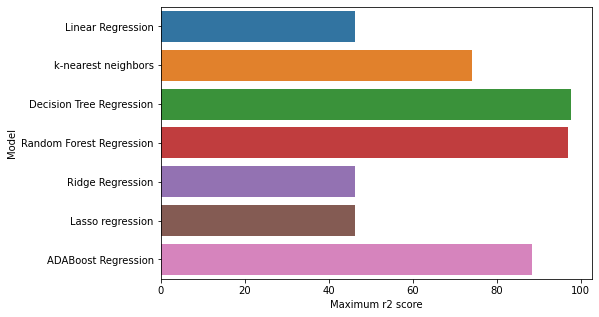

In [122]:
#Plotting bar plot of Maximum r2 scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Maximum r2 score', y = 'Model', data = model2)

Observations:

1- After comparing above 7 models on basis of scores and errors, & also after using ensemble methods still these 2 models Random Forest regression & Decision Tree Regression are giving good performance.

2- Adaboost Regression is giving good scores but errors are high so we will not select this option.

3- But when we see all the parameters very carefully and making a final decision about selection then Random Forest regression is the best option because all scores are higher , rmse is less and also other errors are less.

4- Now we are going to do Hyperparameter Tuning for Random Forest regression models using RandomizedSearchCV approach for best model selection so that we will get best results after model implementation.

# Hyperparameter Tuning

A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. However, there is another kind of parameters, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. Two best strategies for Hyperparameter tuning are:

1- GridSearchCV 2- RandomizedSearchCV

# RandomizedSearchCV
We have already used gridsearchCv to find best parameters for other models in this project. So for our final model RandomForestRegressor we are using RandomizedSearchCV to get best parameters.Using Scikit-Learn’s RandomizedSearchCV method,we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [123]:
#finding best random state for Random Forest regression
r_state=maximumr2_score(rf,x1,y)

Maximum r2 score for final_r_state 47 is 0.8981627873529839


In [124]:
# Using random_grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
random_grid ={'n_estimators': [80,100,200],'max_features': ['sqrt', 'log2','auto'],'max_depth': [None, 5,10],'min_samples_split': [4, 6,10],
          'min_samples_leaf': [1, 2,5]}
# Random search of parameters, using 3 fold cross validation 
# RandomForestRegressor gives best performance at random_state=47
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=47,n_jobs = -1)
# Fitting the random search model
rf_random.fit(x1,y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [125]:
#Using best parameters obtained from RandomizedSearchCV in RandomForestRegressor model
rfc=RandomForestRegressor(n_estimators=80,max_depth=None,min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=6)
print("For RandomForest Regression R2 Score->")
r_state=maximumr2_score(rfc,x1,y)
print('Mean r2 score for Random Forest Regression is:',cross_val_score(rfc,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Random Forest Regression is',cross_val_score(rfc,x1,y,cv=5,scoring='r2').std())

For RandomForest Regression R2 Score->
Maximum r2 score for final_r_state 57 is 0.8849628190113475
Mean r2 score for Random Forest Regression is: 0.5936737065817884
	Best possible r2score is 1.0
Standard deviation in r2 score for Random Forest Regression is 0.18078435065990586


In [126]:
#Score & Error Metrics for RandomForestRegressor after Hyperparameter Tuning
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=57,test_size=0.20)
y_pred=rfc.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score*100)
print("Cross validation score =",(cross_val_score(abr,x1,y,cv=5,scoring="r2").mean())*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)

r2_score = 93.84514538175472
Cross validation score = 62.59035925151936
Mean_Squared_Error = 2428110894.380849
Mean Absolute_Error = 29928.43562391293
Root Mean Squared Error = 49275.86523218896


Observation:

Random Forest Regression gives best performance before HyperParameter Tuning & also after HyperParameter Tuning as compared to other models so we are going to implement Random Forest Regression model in our project.

# Building the model with best parameter

In [127]:
#We are going to use RandomForest Regressor in this project as it gives best scores at final random state 57.
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=57,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=80,max_depth=None,min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=6)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(y_pred)

[257581.59559028 559226.83852273 429861.60277237 ... 315076.10595328
 760363.54544372 643431.67335814]


In [128]:
print(y_test)

3981    208699.0
2540    597000.0
1597    399000.0
3501    345499.0
1896    385000.0
          ...   
4516    546099.0
1424    268000.0
1853    290000.0
4828    850599.0
1912    575000.0
Name: Price, Length: 1011, dtype: float64


Text(0, 0.5, 'Predcited Values')

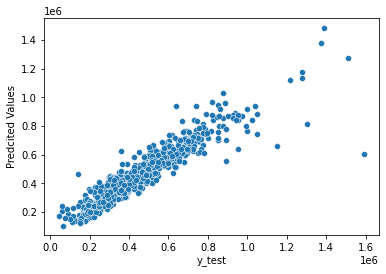

In [129]:
#ScatterPlot between y_test and Predicted values
sns.scatterplot(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Predcited Values")

In [130]:
#Error Metrics & R2Score for our final model
m1=mean_absolute_error(y_test,y_pred)
m2=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error is: ",m1)
print("Mean Squared Error is: ",m2)
print('Root Mean Square Error after model fitting is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Score is:',(rfr.score(x_train,y_train))*100)
print('r2_score after model fitting is:',(r2_score(y_test,y_pred))*100)

Mean Absolute Error is:  42813.24230927247
Mean Squared Error is:  4936898082.770405
Root Mean Square Error after model fitting is: 70263.06343143889
Score is: 93.93924776046265
r2_score after model fitting is: 87.48578986451363


# Evaluate Predictions

In [132]:
#lets make the dataframe for Predictions using Pandas
predict=pd.DataFrame(y_pred,columns=['Predicted Values'])
predict=pd.concat([predict,y_test.reset_index()['Price']],axis=1)
predict.columns=['Predicted Values','Real Values']
predict.round(2)

,Predicted Values,Real Values
0,257581.60,208699.0
1,559226.84,597000.0
2,429861.60,399000.0
3,382169.68,345499.0
4,396752.11,385000.0
...,...,...
1006,548323.08,546099.0
1007,272439.01,268000.0
1008,315076.11,290000.0
1009,760363.55,850599.0


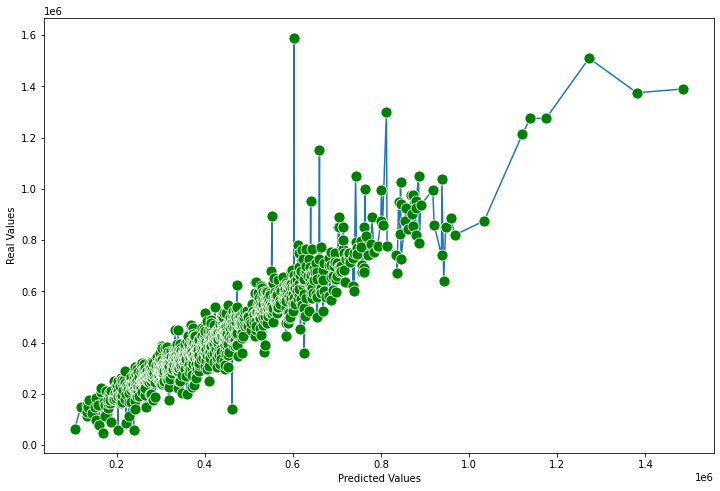

In [133]:
#Graph showing how close are predicted and Real Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
sns.lineplot(x='Predicted Values',y='Real Values',data=predict,ax=ax,marker='o',markerfacecolor='green',markersize=11)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Real Values')
plt.show()

# Conclusion
1- Above Plot shows Predicted values are nearly close to real values.

2- Graph is linear except few deviations and it shows good relation between predicted and real values.

3- R2 Score is best and error is minimum for our selected model.

4- RandomForest Regressor is best selection for this project.

# Saving our model

In [134]:
import joblib
#saving model
joblib.dump(rfr,'Car Price- Prediction Project.pkl')

['Car Price- Prediction Project.pkl']

# Loading the saved model

In [135]:
eval=joblib.load('Car Price- Prediction Project.pkl')
eval

RandomForestRegressor(max_features='sqrt', min_samples_split=6, n_estimators=80)

In [136]:
pred=eval.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, pred)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, pred)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, pred))))

Mean Absolute Error: 42813.24230927247
Mean Squared Error: 4936898082.770405
Root Mean Squared Error: 70263.06343143889


In [137]:
#checking predicted values
print(pred)

[257581.59559028 559226.83852273 429861.60277237 ... 315076.10595328
 760363.54544372 643431.67335814]


Result is OK as per our model.

# ||HAPPY ENDING||